# Students Exam Performance - EDA

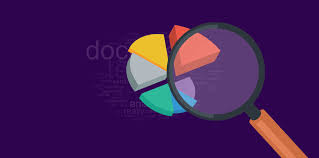

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.columns = df.columns.str.replace(" " , "_" )
df.columns = df.columns.str.replace("/" , "_" )
df.rename(columns ={"parental_level_of_education":"parent_education"}, inplace = True)
df.head(5)


,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df["Avg_total_score"] = (df.math_score + df.reading_score + df.writing_score ) / 3

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   1000 non-null   object 
 1   race_ethnicity           1000 non-null   object 
 2   parent_education         1000 non-null   object 
 3   lunch                    1000 non-null   object 
 4   test_preparation_course  1000 non-null   object 
 5   math_score               1000 non-null   int64  
 6   reading_score            1000 non-null   int64  
 7   writing_score            1000 non-null   int64  
 8   Avg_total_score          1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [6]:
df.describe(include = "O")

,gender,race_ethnicity,parent_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [7]:
df.describe()

,math_score,reading_score,writing_score,Avg_total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


In [9]:
for i in range(len(df.columns)):
    details = df[df.columns[i]].value_counts()
    i = i + 1
    print(details.head(1))

female    518
Name: gender, dtype: int64
group C    319
Name: race_ethnicity, dtype: int64
some college    226
Name: parent_education, dtype: int64
standard    645
Name: lunch, dtype: int64
none    642
Name: test_preparation_course, dtype: int64
65    36
Name: math_score, dtype: int64
72    34
Name: reading_score, dtype: int64
74    35
Name: writing_score, dtype: int64
68.0    15
Name: Avg_total_score, dtype: int64


In [10]:
df.columns

Index(['gender', 'race_ethnicity', 'parent_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Avg_total_score'],
      dtype='object')

 Let's form a dataframe and check for Missing Values.

In [11]:
def Missing_Values(df):
    mis_val = df.isnull().sum(0)
    mis_val_per = 100 * df.isnull().sum(0) / len(df)
    miss_val_df = pd.concat([mis_val , mis_val_per] , axis = 1)
    miss_val_df.rename(mapper = {0:"Missing_Values" , 1:"% of Missing Values"} , axis = "columns" , inplace = True)
    return miss_val_df

In [12]:
Missing_Values(df)

,Missing_Values,% of Missing Values
gender,0,0.0
race_ethnicity,0,0.0
parent_education,0,0.0
lunch,0,0.0
test_preparation_course,0,0.0
math_score,0,0.0
reading_score,0,0.0
writing_score,0,0.0
Avg_total_score,0,0.0


# Visualizing the dataset step by step.

In [13]:
gender = df.gender.value_counts()
race = df.race_ethnicity.value_counts()
parent_education_level = df.parent_education.value_counts()
lunch = df.lunch.value_counts()
test_prep = df.test_preparation_course.value_counts()

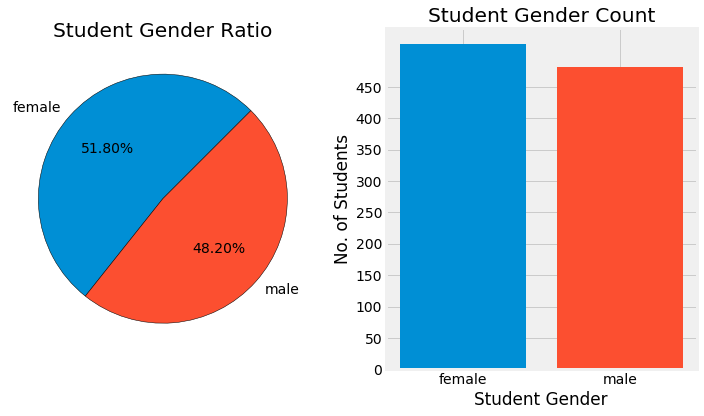

In [14]:
plt.style.use("fivethirtyeight")

fig , (ax1 , ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (10, 6) , facecolor = "w")

ax1.pie(x = gender, labels = gender.index , colors = ["#008fd5",'#fc4f30'] ,  wedgeprops= {'edgecolor':'k' } , 
        startangle = 45 , autopct = "%1.2f%%")
ax1.set_title("Student Gender Ratio")


ax2.bar(x = gender.index , height= gender.values , color = ["#008fd5",'#fc4f30'] )
ax2.set_xlabel("Student Gender")
ax2.set_ylabel("No. of Students")
ax2.set_title("Student Gender Count")
ax2.set_yticks(ticks = np.arange(0,500,50))

plt.tight_layout()
plt.show()

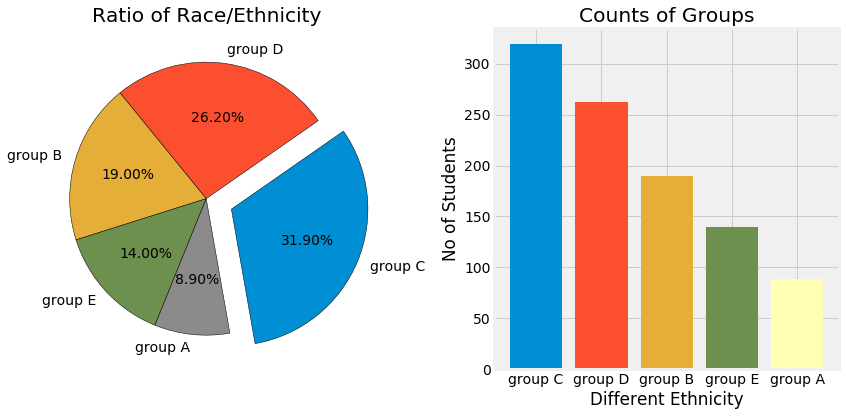

In [15]:
fig , (ax1, ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 6), facecolor = "w")

ax1.pie(x = race, labels = race.index , wedgeprops= {'edgecolor':'k' } , autopct = "%1.2f%%" , startangle = -80,
       explode = [0.2 , 0,0,0,0])
ax1.set_title("Ratio of Race/Ethnicity")


ax2.bar(x = race.index , height = race.values , color = [ "#008fd5",'#fc4f30' ,'#e5ae37' ,'#6d904f' , "#feffb3"])
ax2.set_ylabel("No of Students")
ax2.set_xlabel("Different Ethnicity")
ax2.set_title("Counts of Groups")


plt.tight_layout()
plt.show()

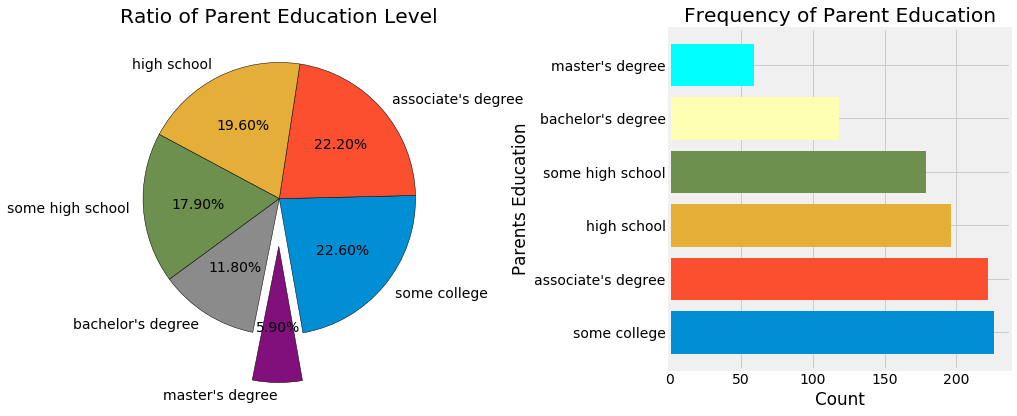

In [16]:
fig , (ax1, ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (14 , 6), facecolor = "w")

ax1.pie(x = parent_education_level, labels = parent_education_level.index , wedgeprops= {'edgecolor':'k' } ,
        autopct = "%1.2f%%" , startangle = -80,
       explode = [0 , 0,0,0,0 ,0.35])
ax1.set_title("Ratio of Parent Education Level")


ax2.barh(y = parent_education_level.index , width = parent_education_level.values , 
        color = [ "#008fd5",'#fc4f30' ,'#e5ae37' ,'#6d904f' , "#feffb3" , "cyan"])
ax2.set_ylabel("Parents Education")
ax2.set_xlabel("Count")
ax2.set_title("Frequency of Parent Education")


plt.tight_layout()
plt.show()

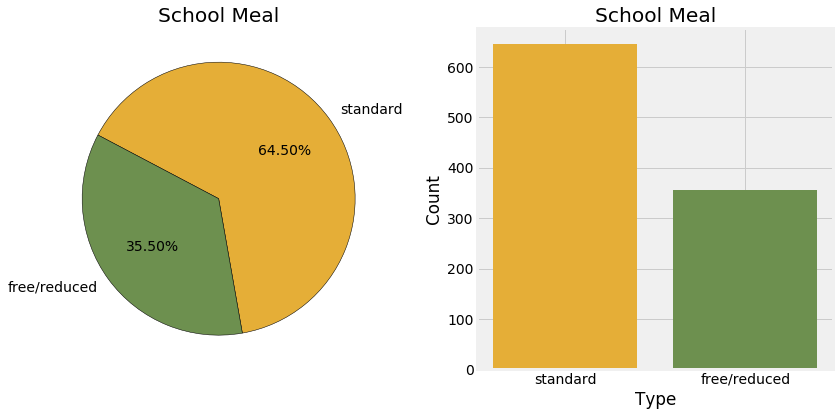

In [17]:
fig , (ax1 , ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 6),  facecolor = "w")

ax1.pie(x =lunch , labels = lunch.index ,colors = ['#e5ae37' ,'#6d904f'], wedgeprops= {'edgecolor':'k' } ,
        autopct = "%1.2f%%" , startangle = -80, explode = [0,0])
ax1.set_title("School Meal")

ax2.bar(lunch.index , lunch.values , color = ['#e5ae37' ,'#6d904f'])
ax2.set_xlabel("Type")
ax2.set_ylabel("Count")
ax2.set_title("School Meal")

plt.tight_layout()
plt.show()

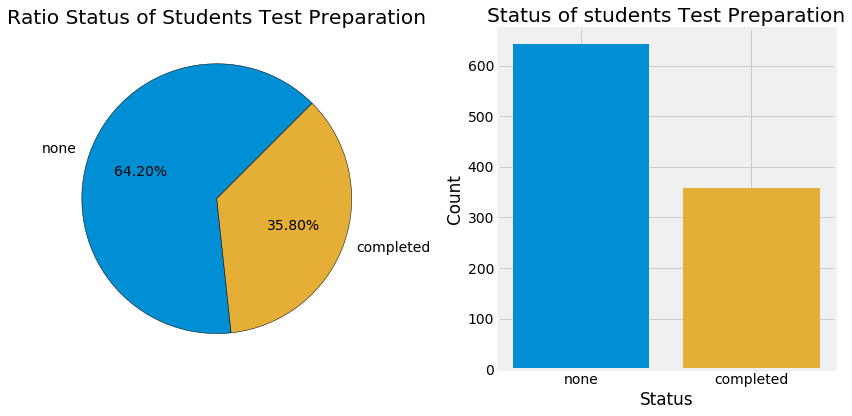

In [18]:
fig , (ax1 , ax2) = plt.subplots(nrows = 1 , ncols = 2 , figsize = (12 , 6) , facecolor = "w")

ax1.pie(x = test_prep , labels = test_prep.index , wedgeprops= {'edgecolor':'k' } ,colors = ["#008fd5" , "#e5ae37"] ,
        autopct = "%1.2f%%" , startangle = 45, explode = [0,0])
ax1.set_title("Ratio Status of Students Test Preparation")
  
ax2.bar(test_prep.index , test_prep.values , color = ["#008fd5" , "#e5ae37"])
ax2.set_xlabel("Status")
ax2.set_ylabel("Count")
ax2.set_title("Status of students Test Preparation")


plt.tight_layout()
plt.show()

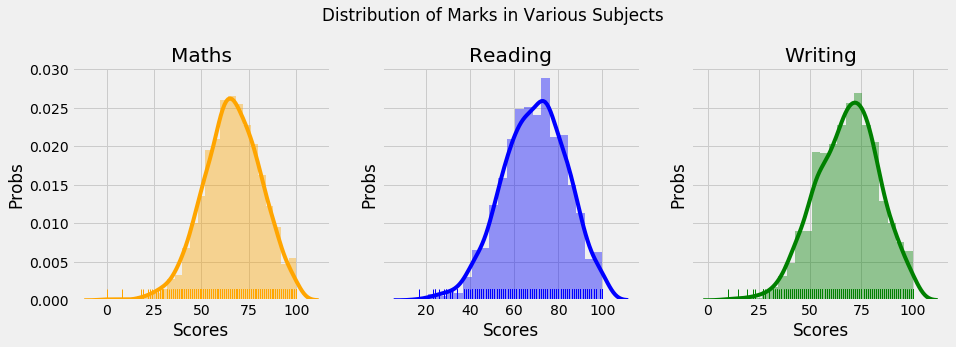

In [20]:
fig , axes = plt.subplots(nrows = 1 ,ncols = 3, figsize=(14, 4) , sharey = True)
plt.suptitle("Distribution of Marks in Various Subjects " , y = 1.09)
axes[0].set_title("Maths")
axes[1].set_title("Reading")
axes[2].set_title("Writing")
sns.distplot(df.math_score , ax=axes[0] ,kde = True ,rug = True , color = "orange")
sns.distplot(df.reading_score , ax = axes[1], kde = True ,rug = True,color =  "blue" )
sns.distplot(df.writing_score , ax = axes[2] ,kde = True,rug = True, color = "green" )
[axes[i].set_xlabel("Scores") for i in range (0,3)]
[axes[i].set_ylabel("Probs") for i in range (0,3)]
plt.show()

Let's Check  for Correlation between attributes

In [21]:
df.corr()

,math_score,reading_score,writing_score,Avg_total_score
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
Avg_total_score,0.918746,0.970331,0.965667,1.000000


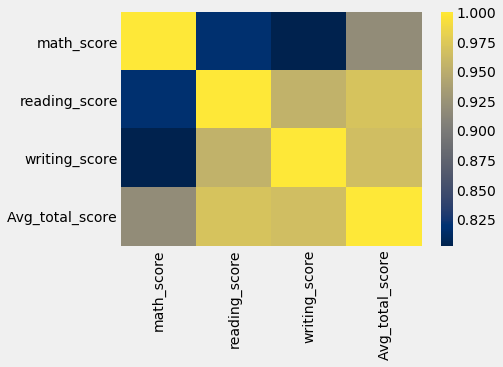

In [22]:
sns.heatmap(df.corr() , cmap = "cividis")

In [23]:
pd.crosstab(df.race_ethnicity, df.parent_education)

parent_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race_ethnicity,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


This gives us the distribution among two attributes.

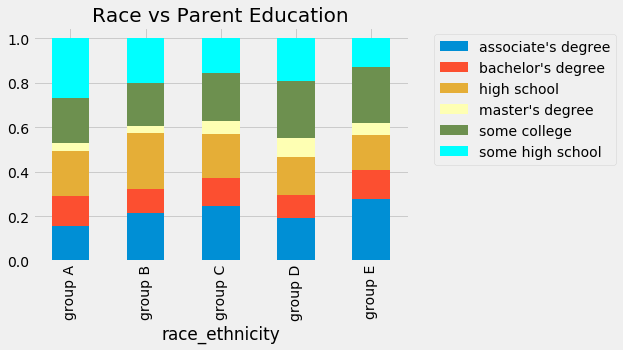

In [24]:
tab = pd.crosstab(df.race_ethnicity, df.parent_education)
rpd = tab.div(tab.sum(1).astype(float) , axis = 0)
rpd.plot(kind = 'bar', stacked = 'True' , legend = False , 
         color = ["#008fd5",'#fc4f30' ,'#e5ae37' , "#feffb3" ,'#6d904f', "cyan"])
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title('Race vs Parent Education', fontweight = 30, fontsize = 20)
plt.show()

Let's Plot Average Total score against different attributes and find some insights , how student marks is varied with respect to other attributes.

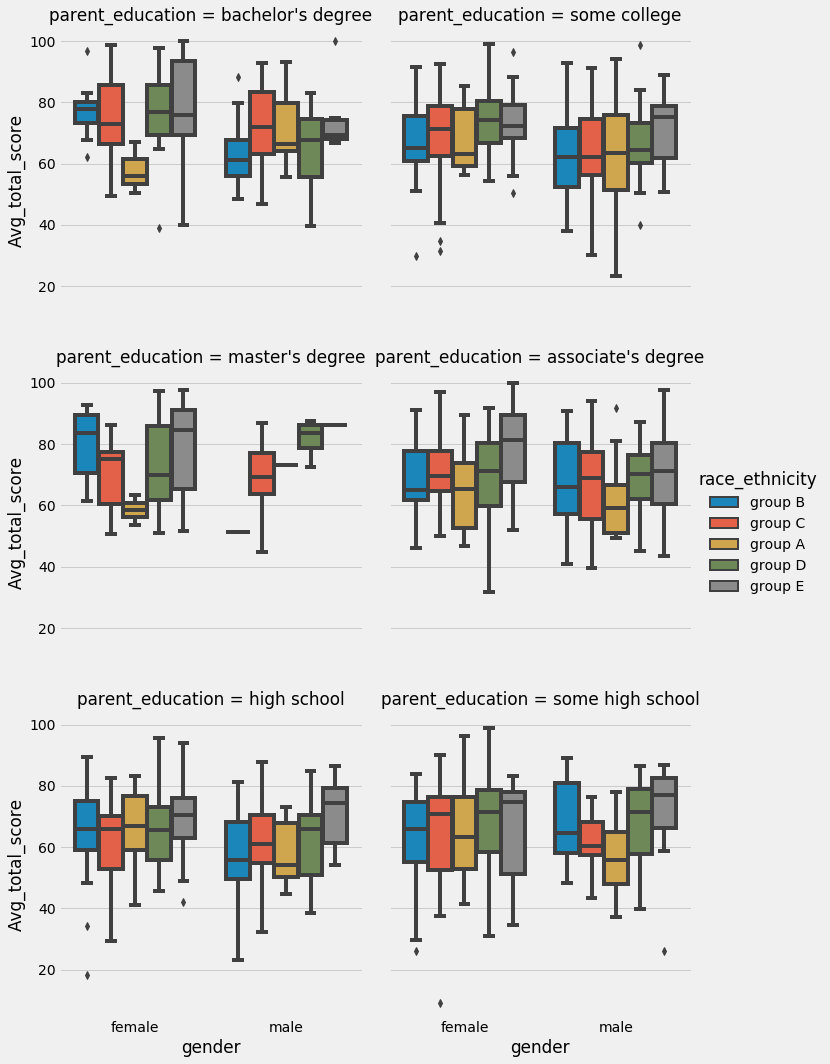

In [25]:
sns.catplot(kind = "box" , x = "gender" , y = "Avg_total_score" , data = df, hue = "race_ethnicity",
            col = "parent_education" , col_wrap = 2)
plt.show()

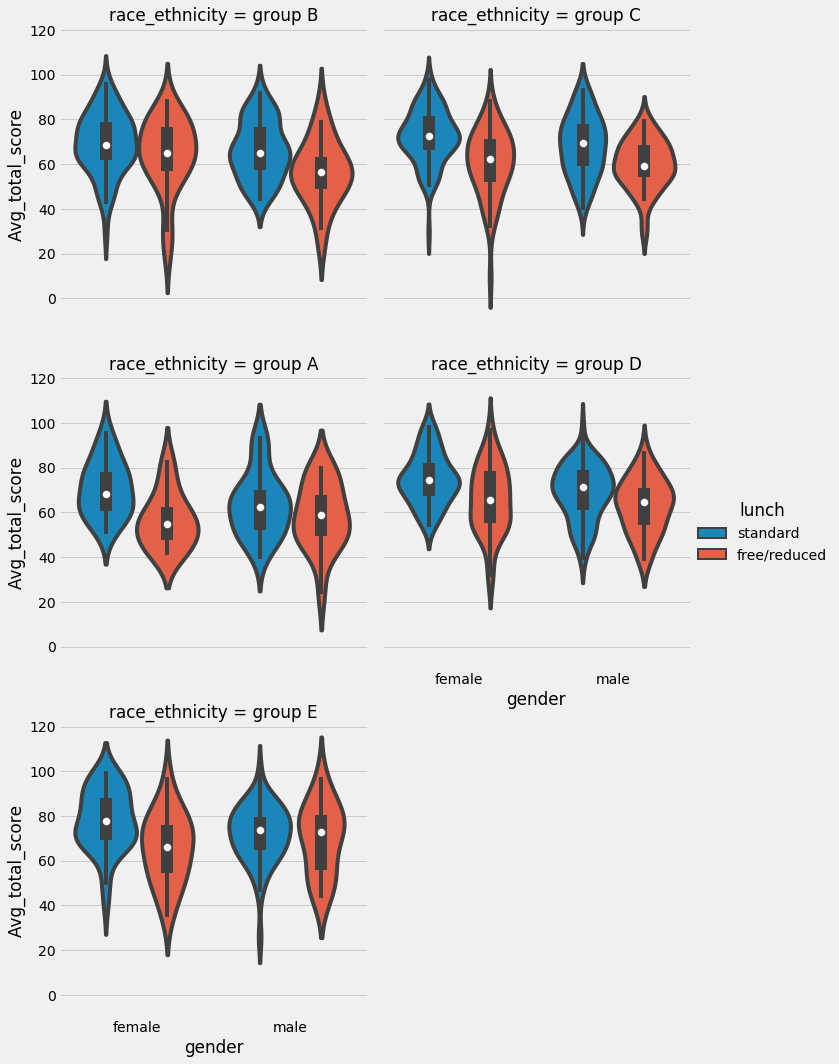

In [26]:
sns.catplot(kind = "violin" , x = "gender" , y = "Avg_total_score" , data = df, hue = "lunch",
            col = "race_ethnicity" , col_wrap = 2)
plt.show()

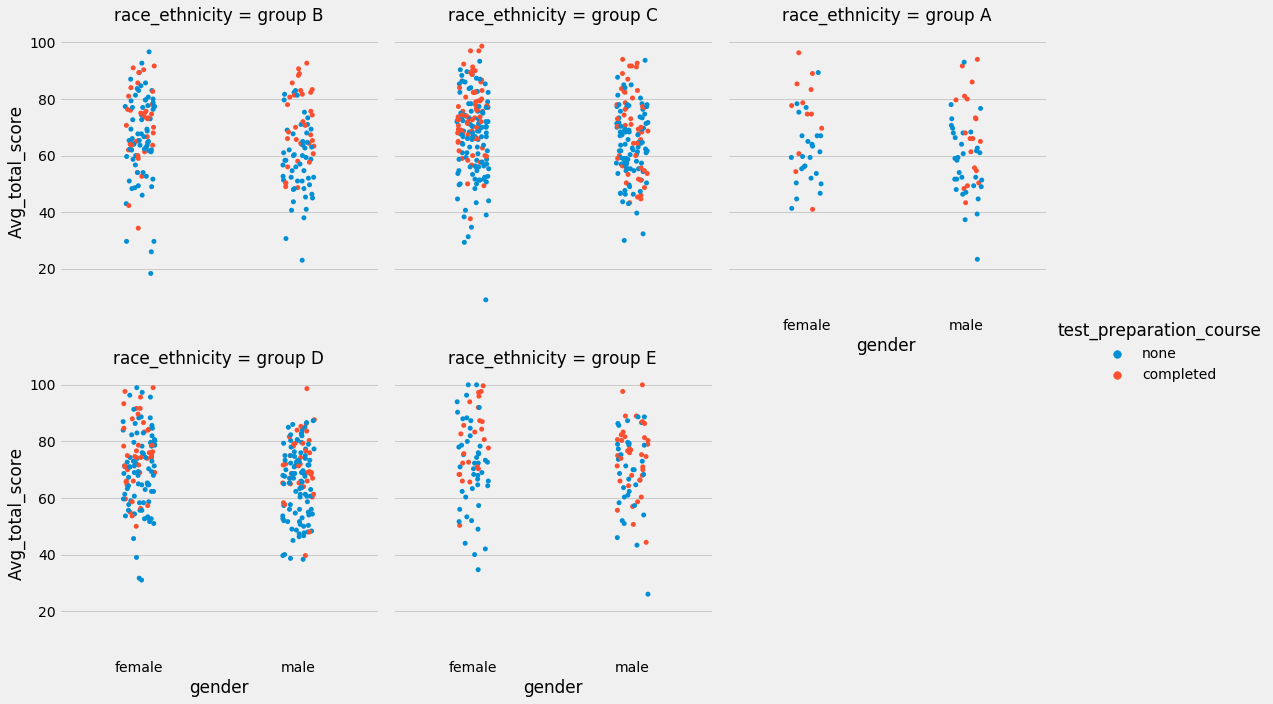

In [27]:
sns.catplot(kind = "strip" , x = "gender" , y = "Avg_total_score" , data = df , hue = "test_preparation_course",
           col = "race_ethnicity", col_wrap = 3)
plt.show()

# Groupby and Heatmaps

In [34]:
gender_data = df.groupby("gender")[df.columns[5:]].mean()

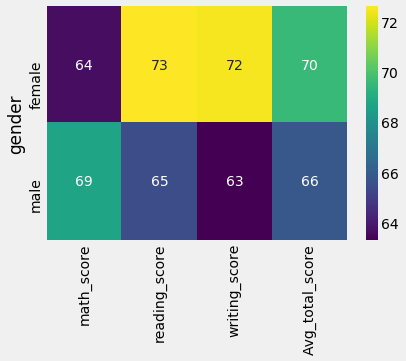

In [35]:
sns.heatmap(gender_data,annot = True , cmap = "viridis")

In [36]:
race_data = df.groupby("race_ethnicity")[df.columns[5:]].mean()
race_data

,math_score,reading_score,writing_score,Avg_total_score
race_ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


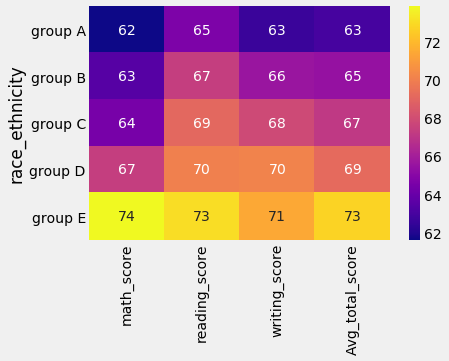

In [37]:
sns.heatmap(race_data,annot = True , cmap = "plasma")

In [38]:
parent_data = df.groupby("parent_education")[df.columns[5:]].mean()
parent_data

,math_score,reading_score,writing_score,Avg_total_score
parent_education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


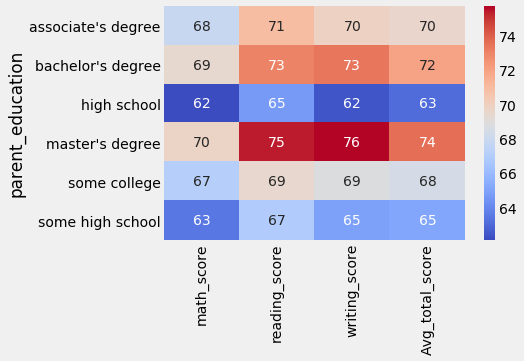

In [39]:
sns.heatmap(parent_data,annot = True , cmap = "coolwarm")

In [40]:
prep_data = df.groupby("test_preparation_course")[df.columns[5:]].mean()
prep_data

,math_score,reading_score,writing_score,Avg_total_score
test_preparation_course,,,,
completed,69.695531,73.893855,74.418994,72.669460
none,64.077882,66.534268,64.504673,65.038941


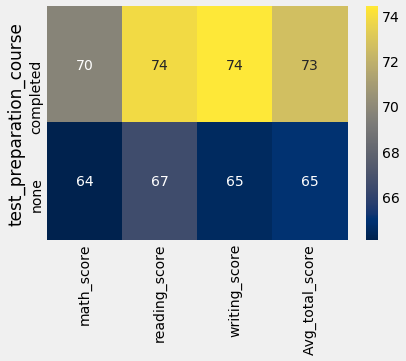

In [41]:
sns.heatmap(prep_data,annot = True , cmap = "cividis")

In [42]:
lunch_data = df.groupby("lunch")[df.columns[5:]].mean()
lunch_data

,math_score,reading_score,writing_score,Avg_total_score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


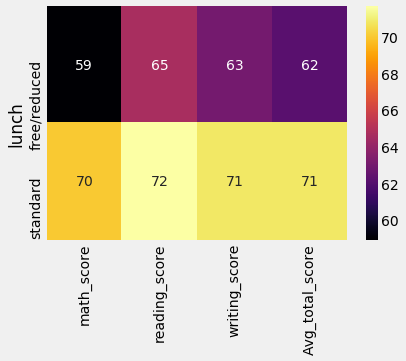

In [43]:
sns.heatmap(lunch_data , annot = True , cmap = "inferno")

# Visualization with respect to Results 

In [44]:
df["Overall_Results"] = "Results Pending"

In [45]:
df.loc[(df.math_score >= 50) & (df.reading_score >= 50) & (df.writing_score >= 50) , "Overall_Results"] = "Pass"
df.loc[df.Overall_Results != "Pass" , "Overall_Results"] = "Fail"

In [49]:
df.Overall_Results.value_counts()

Pass    812
Fail    188
Name: Overall_Results, dtype: int64

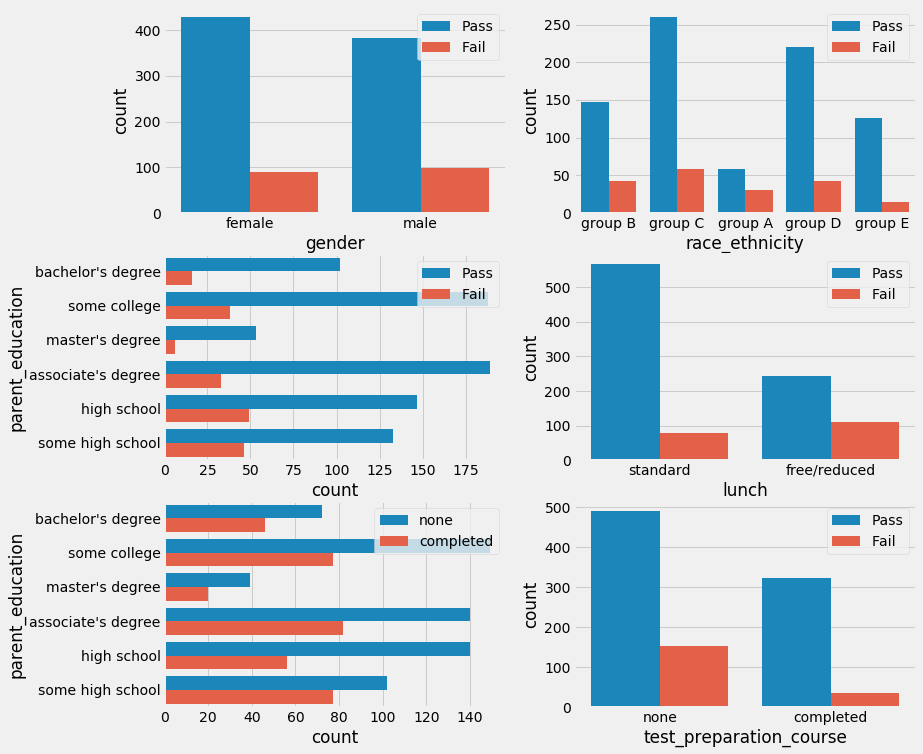

In [50]:
fig , ax = plt.subplots(nrows = 3 , ncols = 2 , figsize = (12 , 12)) 
g = sns.countplot(x = "gender" , hue = "Overall_Results" , data = df, ax = ax[0][0])
g.legend()
g = sns.countplot(x = "race_ethnicity" , hue = "Overall_Results" , data = df ,ax= ax[0][1])
g.legend()
g = sns.countplot(y = "parent_education" , hue = "Overall_Results" , data = df ,ax= ax[1][0])
g.legend()
g = sns.countplot(x = "lunch" , hue = "Overall_Results" , data = df ,ax= ax[1][1])
g.legend()
g = sns.countplot(x = "test_preparation_course" , hue = "Overall_Results" , data = df ,ax= ax[2][1])
g.legend()
g = sns.countplot(y = "parent_education" , hue = "test_preparation_course" , data = df , ax = ax[2][0])
g.legend()
plt.show()

# Visualization With respect to Grades

In [48]:
def New_Grade(Avg_total_score, Overall_Results):
  
  if(Avg_total_score >= 90):
    return '0'
  if(Avg_total_score >= 80):
    return 'A'
  if(Avg_total_score >= 70):
    return 'B'
  if(Avg_total_score >= 60):
    return 'c'
  if(Avg_total_score >= 50):
    return 'D'
  else :
    return 'E'

df['Grade'] = df.apply(lambda x: New_Grade(x['Avg_total_score'], x['Overall_Results']), axis = 1)


In [92]:
df.head()

,gender,race_ethnicity,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Avg_total_score,Overall_Results,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,E
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,B


In [93]:
gender = pd.crosstab(df.gender , df.Grade) 
gender

Grade,0,A,B,D,E,c
gender,,,,,,
female,38,80,150,85,39,126
male,14,66,111,97,64,130


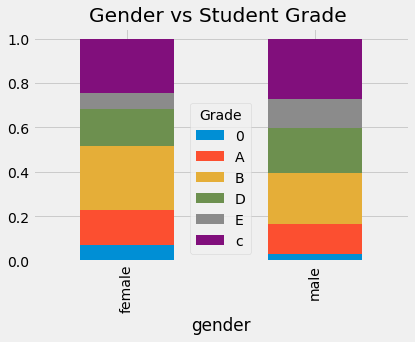

In [94]:
gender = pd.crosstab(df.gender , df.Grade)
gender.div(gender.sum(axis = 1).astype(float),axis = 0).plot(kind = "bar" , stacked = True)
plt.title("Gender vs Student Grade ")
plt.show()

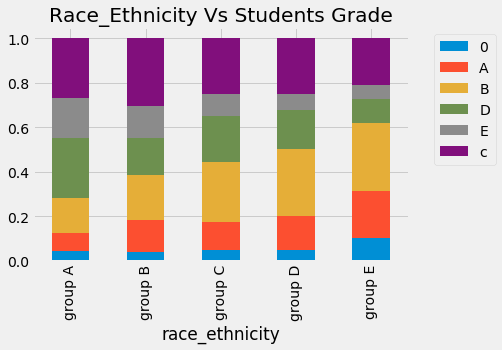

In [95]:
race = pd.crosstab(df.race_ethnicity , df.Grade)
race.div(race.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Race_Ethnicity Vs Students Grade")
plt.show()

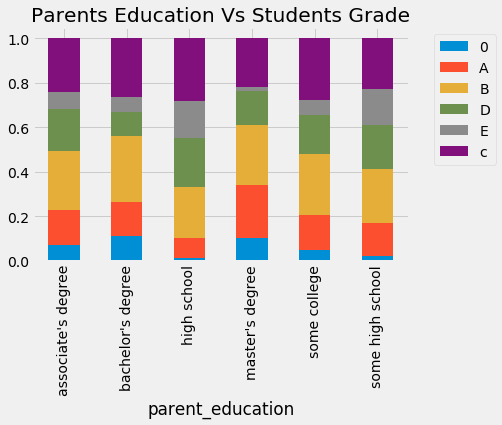

In [96]:
par_ed = pd.crosstab(df.parent_education , df.Grade)
par_ed.div(par_ed.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Parents Education Vs Students Grade")
plt.show()

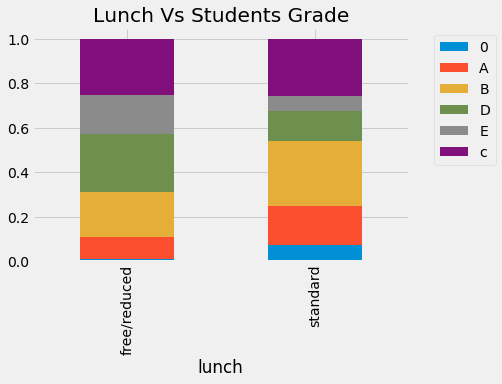

In [97]:
lunch = pd.crosstab(df.lunch , df.Grade)
lunch.div(lunch.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Lunch Vs Students Grade")
plt.show()

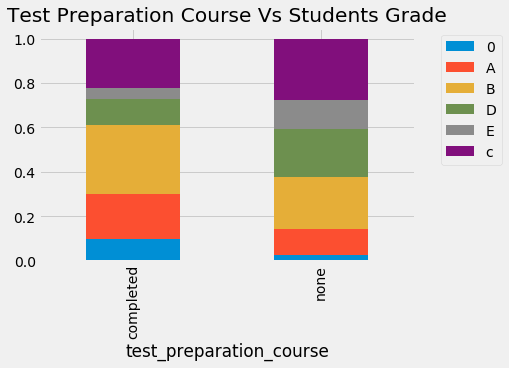

In [98]:
test_prep = pd.crosstab(df.test_preparation_course , df.Grade)
test_prep.div(test_prep.sum(1).astype(float) , axis = 0).plot(kind = "bar", stacked = True )
plt.legend(bbox_to_anchor = (1.05 , 1))
plt.title("Test Preparation Course Vs Students Grade")
plt.show()

Group E students , children of Master's Degree parents and those who completed test preparation course are more likely to score 
[O or A] Grade in Examination.

Kindly Upvote if you like my work.
                                       Thank You!